# OSA-CASE STUDY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, mean_absolute_error, mean_squared_error, max_error, r2_score

from scipy.stats import uniform, truncnorm, randint
from sklearn import model_selection, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.tree import plot_tree

In [2]:
df = pd.read_excel("../DATA/OSA_EXTREME_DF_MALES_REGRESSION.xlsx")
df = df.set_index('Patient')

In [3]:
predictors = ['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['IAH'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0, shuffle=True)

## Linear Regression

### Standart algorithm

MSE:  380.196385004285
RMSE:  19.498625208057234
MAE:  15.845892683895364
R2 score:  0.32283996423265093


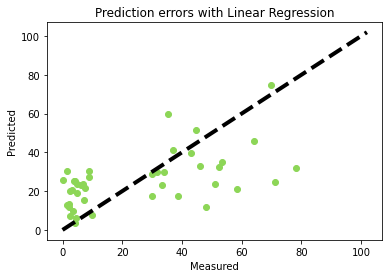

In [5]:
clf = LinearRegression()

clf.fit(X_train, y_train)
y_pred_linear = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
rmse =  mean_squared_error(y_test, y_pred_linear, squared=False)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)



fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_linear, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Linear Regression')
plt.show()

### Standard with cross validation

MSE cross validated:  362.0171211207653
RMSE cross validated:  18.926093834060413
MAE cross validated:  15.660552376072829
R2 score cross validated:  0.2916474423376206


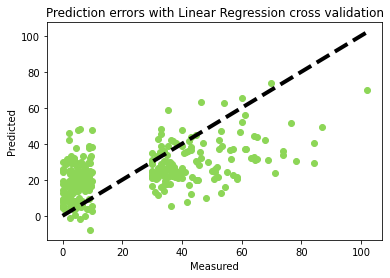

In [6]:
mse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

y_pred_linear_cross = cross_val_predict(clf, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_pred_linear_cross, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Linear Regression cross validation')
plt.show()

## KNN

### Standart algorithm

MSE:  497.7742317460318
RMSE:  22.310854572293543
MAE:  17.383015873015875
R2 score:  0.1134244567596071


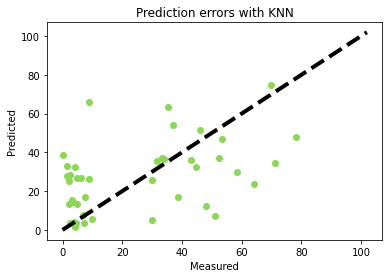

In [7]:
clf = KNeighborsRegressor(n_neighbors=3)

clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
rmse =  mean_squared_error(y_test, y_pred_knn, squared=False)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_knn, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN')
plt.show()

### Standard with cross validation

MSE cross validated:  437.30923452980795
RMSE cross validated:  20.822832069437926
MAE cross validated:  15.855234533270997
R2 score cross validated:  0.14044378083326078


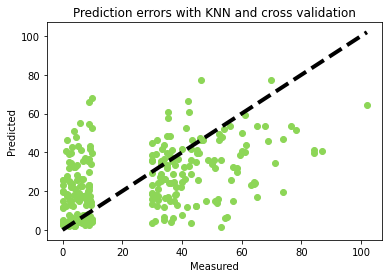

In [8]:
mse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

y_pred_knn_cross = cross_val_predict(clf, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_pred_knn_cross, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN and cross validation')
plt.show()

### GridSearch

In [9]:
clf = KNeighborsRegressor()
grid_values = {'n_neighbors': np.arange(1,50),'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'r2', cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [10]:
print(f'Best Score: {grid_clf_acc.best_score_:.3f}\n')
print(f'Best estimator: {grid_clf_acc.best_estimator_}\n')
print(f'Best parameter set: {grid_clf_acc.best_params_}\n')

Best Score: 0.207

Best estimator: KNeighborsRegressor(n_neighbors=20, weights='distance')

Best parameter set: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}



MSE:  365.35088054092785
RMSE:  19.11415393212391
MAE:  15.133647696543486
R2 score:  0.3492809897917918


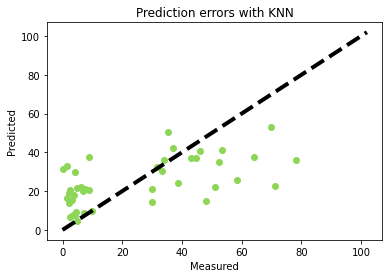

In [11]:
#Predict values based on new parameters
y_pred_acc_knn = grid_clf_acc.predict(X_test)

mse_acc = mean_squared_error(y_test, y_pred_acc_knn)
rmse_acc =  mean_squared_error(y_test, y_pred_acc_knn, squared=False)
mae_acc = mean_absolute_error(y_test, y_pred_acc_knn)
r2_acc = r2_score(y_test, y_pred_acc_knn)

print("MSE: ",mse_acc)
print("RMSE: ",rmse_acc)
print("MAE: ",mae_acc)
print("R2 score: ",r2_acc)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_acc_knn, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with KNN')
plt.show()

## SVM

### Standart algorithm

MSE:  656.6330181318328
RMSE:  25.62485157287419
MAE:  19.36439436960722
R2 score:  -0.1695156913161151


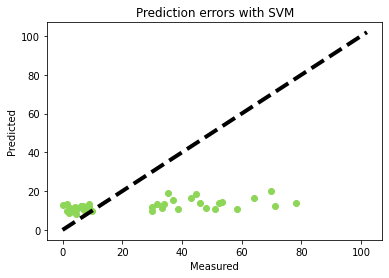

In [12]:
clf = SVR(C=1.0, epsilon=0.2)

clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_svm)
rmse =  mean_squared_error(y_test, y_pred_svm, squared=False)
mae = mean_absolute_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_svm, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM')
plt.show()


### Standard with cross validation

MSE cross validated:  647.5794586174674
RMSE cross validated:  25.27343034691079
MAE cross validated:  19.85110242063317
R2 score cross validated:  -0.262394212743317


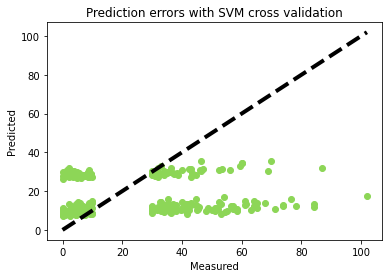

In [13]:
mse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

y_pred_svm_cross = cross_val_predict(clf, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_pred_svm_cross, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM cross validation')
plt.show()

### GridSearch

In [14]:
clf = SVR()
grid_values = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'r2', cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='r2')

In [15]:
print(f'Best Score: {grid_clf_acc.best_score_:.3f}\n')
print(f'Best estimator: {grid_clf_acc.best_estimator_}\n')
print(f'Best parameter set: {grid_clf_acc.best_params_}\n')

Best Score: 0.196

Best estimator: SVR(C=10, gamma=0.0001)

Best parameter set: {'C': 10, 'epsilon': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}



MSE:  381.7717771219569
RMSE:  19.5389809642662
MAE:  15.561074410548482
R2 score:  0.32003406542659496


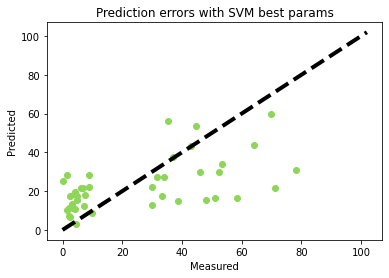

In [16]:
#Predict values based on new parameters
y_pred_acc_svm = grid_clf_acc.predict(X_test)

mse_acc = mean_squared_error(y_test, y_pred_acc_svm)
rmse_acc =  mean_squared_error(y_test, y_pred_acc_svm, squared=False)
mae_acc = mean_absolute_error(y_test, y_pred_acc_svm)
r2_acc = r2_score(y_test, y_pred_acc_svm)

print("MSE: ",mse_acc)
print("RMSE: ",rmse_acc)
print("MAE: ",mae_acc)
print("R2 score: ",r2_acc)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_acc_svm, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM best params')
plt.show()

## Random Forest

### Standart algorithm

MSE:  400.81024171518175
RMSE:  20.020245795573583
MAE:  16.156700007354427
R2 score:  0.2861250440013696


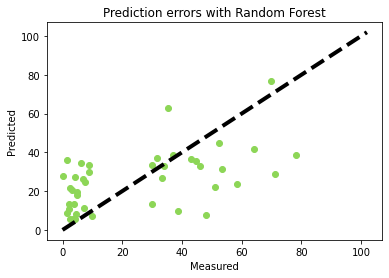

In [17]:
clf = RandomForestRegressor(n_estimators = 10, criterion = 'mse',max_depth    = 4,)

clf.fit(X_train, y_train)
y_pred_forest = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_forest)
rmse =  mean_squared_error(y_test, y_pred_forest, squared=False)
mae = mean_absolute_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_forest, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Random Forest')
plt.show()

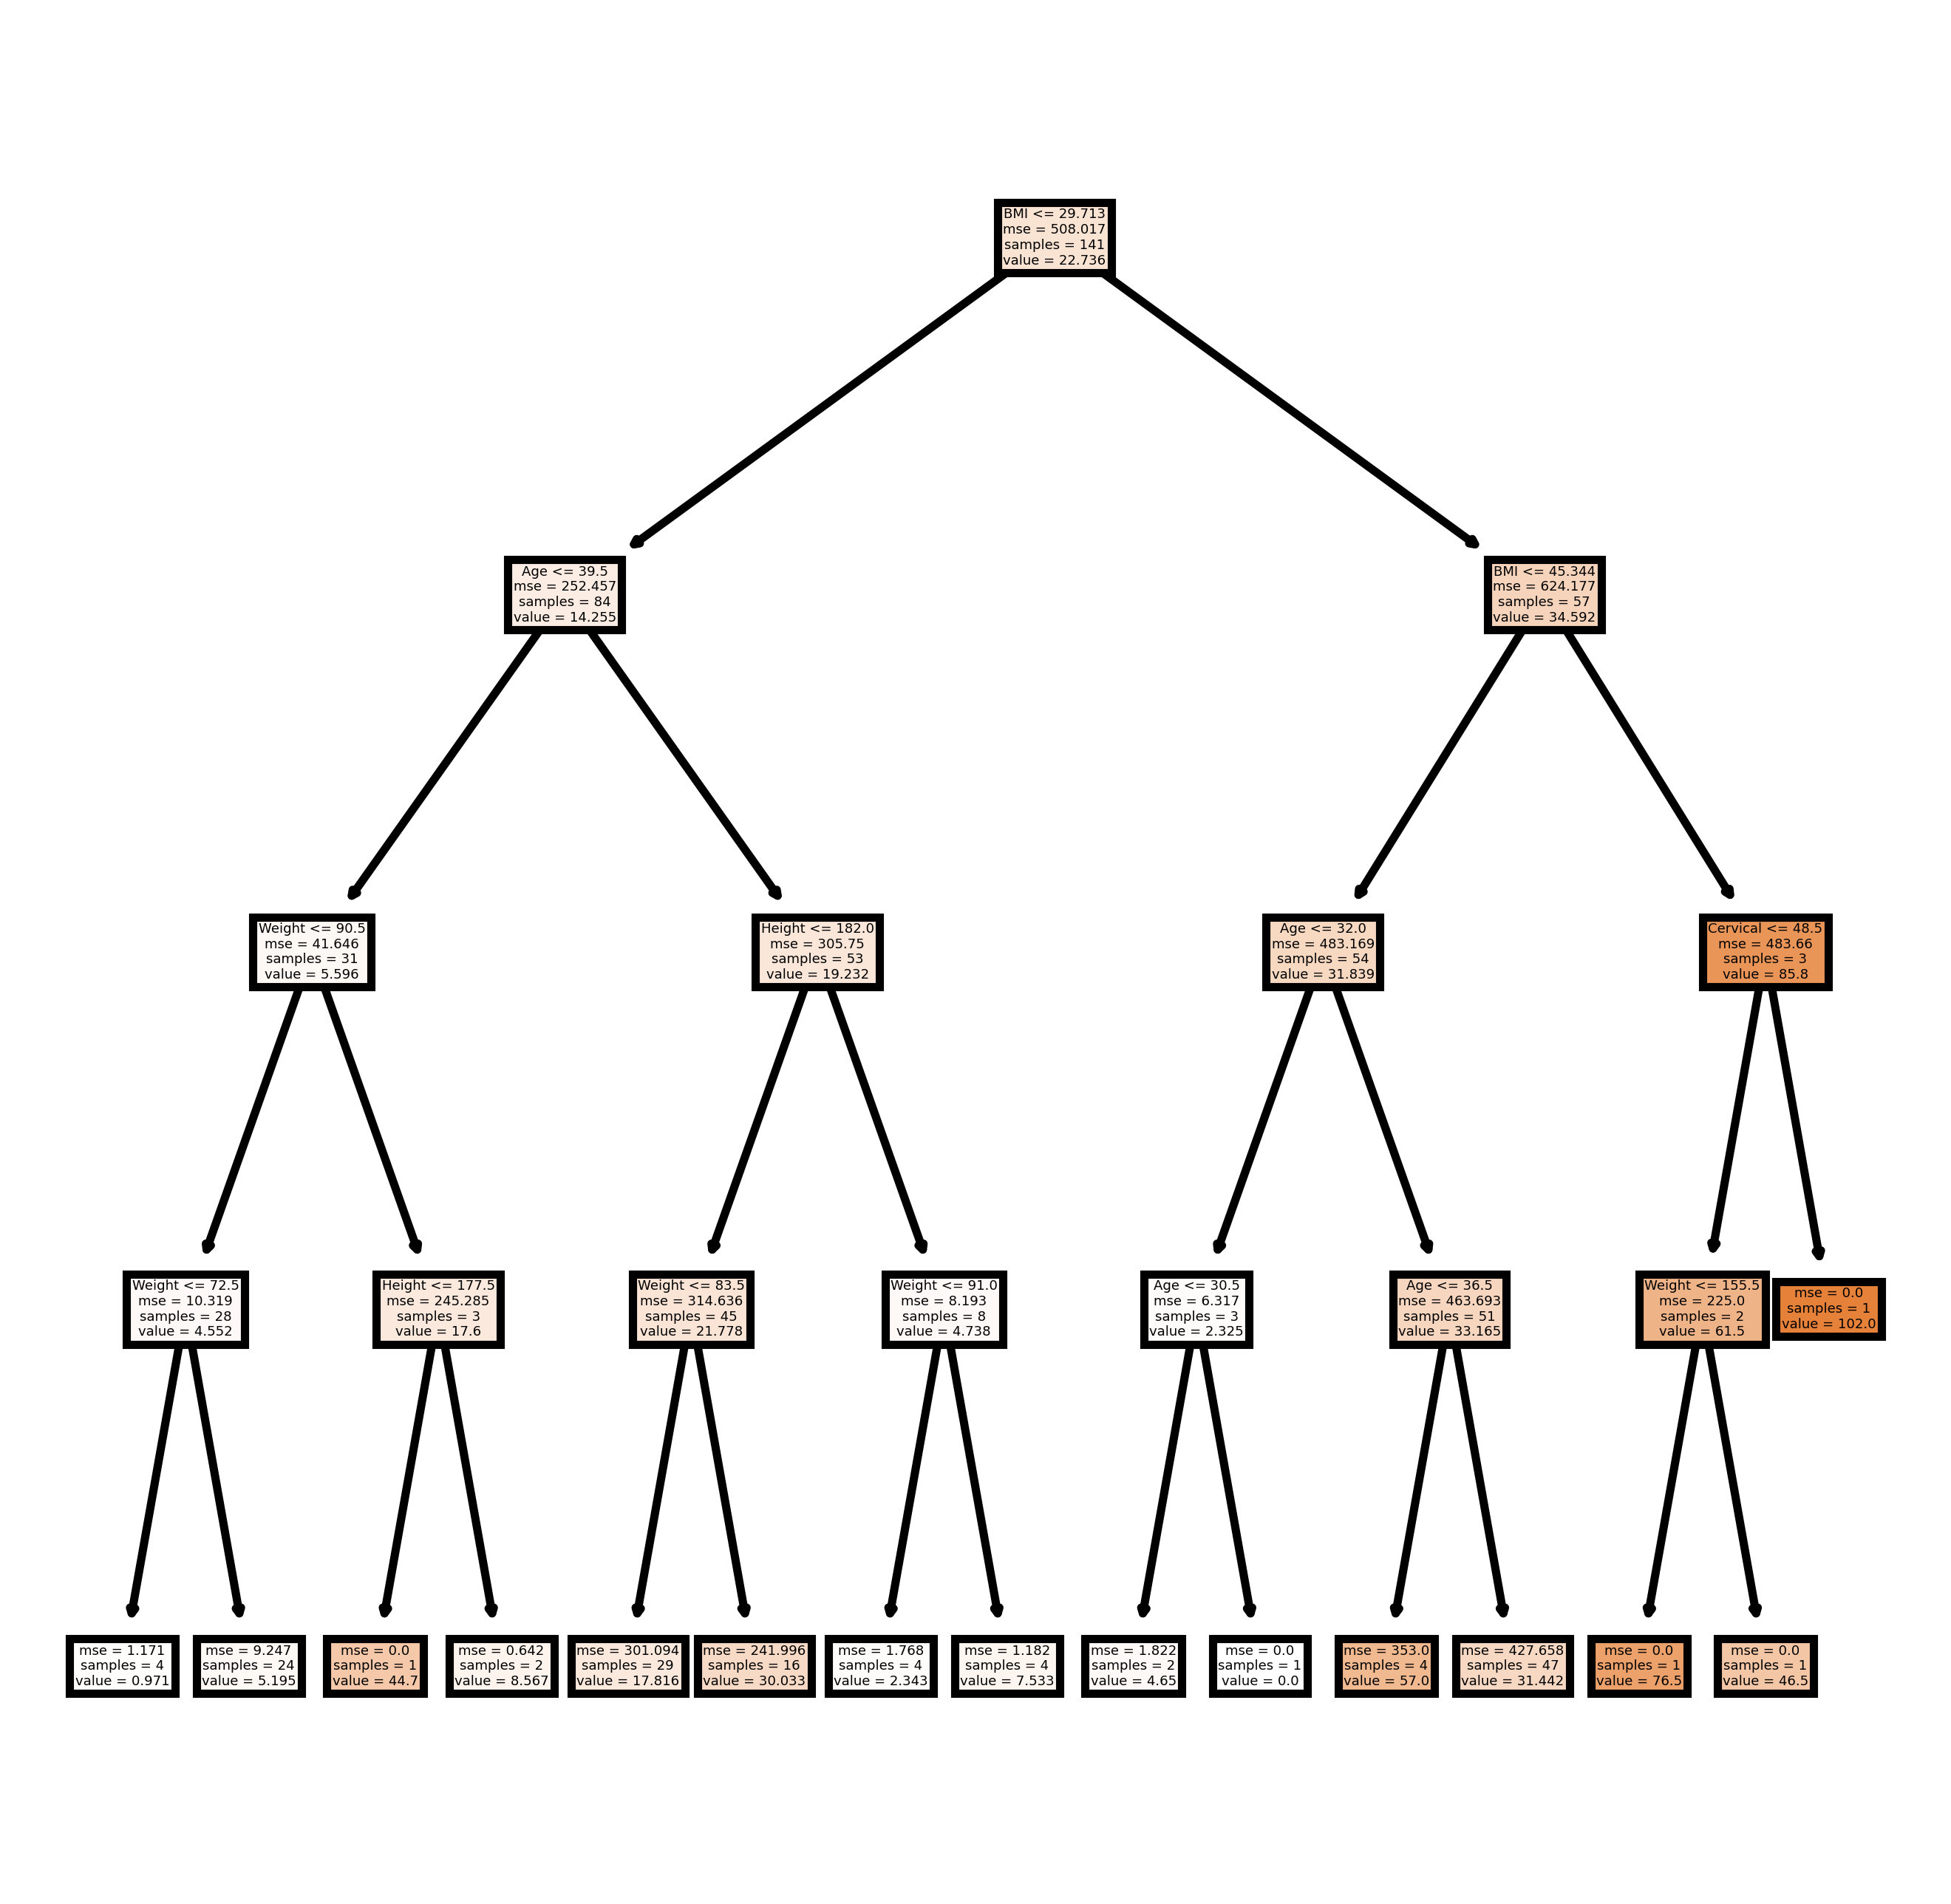

In [18]:
fn=df[predictors].columns
cn=df['IAH'].name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

### Standard with cross validation

MSE cross validated:  389.53782068809636
RMSE cross validated:  19.909975762618476
MAE cross validated:  15.796033212198076
R2 score cross validated:  0.24828481429907504


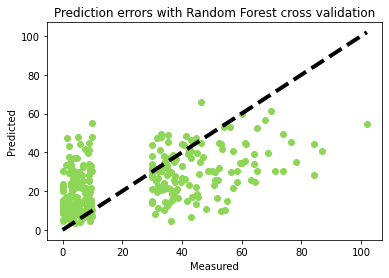

In [19]:
mse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

y_pred_forest_cross = cross_val_predict(clf, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_pred_forest_cross, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Random Forest cross validation')
plt.show()

### GridSearch

In [20]:
clf = RandomForestRegressor()
grid_values = {'n_estimators': [1,2,3,4,5,10,20,50,100,200],
        'criterion':['mse','mae'],
        'max_depth': [1,2,3,4,5,10,50],
        'random_state': [1],
        'max_features':['auto', 'sqrt', 'log2'],
    }

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'r2', cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 10, 20, 50, 100, 200],
                         'random_state': [1]},
             scoring='r2')

In [21]:
print(f'Best Score: {grid_clf_acc.best_score_:.3f}\n')
print(f'Best estimator: {grid_clf_acc.best_estimator_}\n')
print(f'Best parameter set: {grid_clf_acc.best_params_}\n')

Best Score: 0.238

Best estimator: RandomForestRegressor(criterion='mae', max_depth=10, max_features='sqrt',
                      n_estimators=50, random_state=1)

Best parameter set: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 1}



MSE:  421.63524732952385
RMSE:  20.533758723855794
MAE:  15.941809523809525
R2 score:  0.2490340507598


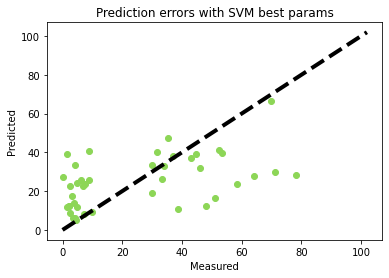

In [22]:
#Predict values based on new parameters
y_pred_acc_forest = grid_clf_acc.predict(X_test)

mse_acc = mean_squared_error(y_test, y_pred_acc_forest)
rmse_acc =  mean_squared_error(y_test, y_pred_acc_forest, squared=False)
mae_acc = mean_absolute_error(y_test, y_pred_acc_forest)
r2_acc = r2_score(y_test, y_pred_acc_forest)

print("MSE: ",mse_acc)
print("RMSE: ",rmse_acc)
print("MAE: ",mae_acc)
print("R2 score: ",r2_acc)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_acc_forest, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM best params')
plt.show()

## Decision Tree

### Standart algorithm

MSE:  530.4457028271102
RMSE:  23.03140687902305
MAE:  19.37669695071011
R2 score:  0.05523396521775392


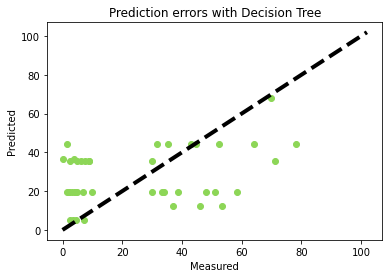

In [23]:
clf = DecisionTreeRegressor(max_depth= 3)

clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_tree)
rmse =  mean_squared_error(y_test, y_pred_tree, squared=False)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 score: ",r2)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_tree, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with Decision Tree')
plt.show()

Profundidad del árbol: 3
Número de nodos terminales: 8


[Text(334.8, 237.82500000000002, 'BMI <= 30.45\nsamples = 235\nvalue = 24.72'),
 Text(167.4, 169.875, 'Age <= 38.5\nsamples = 154\nvalue = 17.5'),
 Text(83.7, 101.92500000000001, 'BMI <= 28.86\nsamples = 44\nvalue = 7.31'),
 Text(41.85, 33.974999999999994, 'samples = 37\nvalue = 5.0'),
 Text(125.55000000000001, 33.974999999999994, 'samples = 7\nvalue = 19.51'),
 Text(251.10000000000002, 101.92500000000001, 'Age <= 65.5\nsamples = 110\nvalue = 21.58'),
 Text(209.25, 33.974999999999994, 'samples = 96\nvalue = 19.37'),
 Text(292.95, 33.974999999999994, 'samples = 14\nvalue = 36.7'),
 Text(502.20000000000005, 169.875, 'Weight <= 108.5\nsamples = 81\nvalue = 38.43'),
 Text(418.5, 101.92500000000001, 'BMI <= 33.9\nsamples = 47\nvalue = 31.17'),
 Text(376.65000000000003, 33.974999999999994, 'samples = 38\nvalue = 35.57'),
 Text(460.35, 33.974999999999994, 'samples = 9\nvalue = 12.58'),
 Text(585.9, 101.92500000000001, 'Cervical <= 49.5\nsamples = 34\nvalue = 48.48'),
 Text(544.0500000000001, 

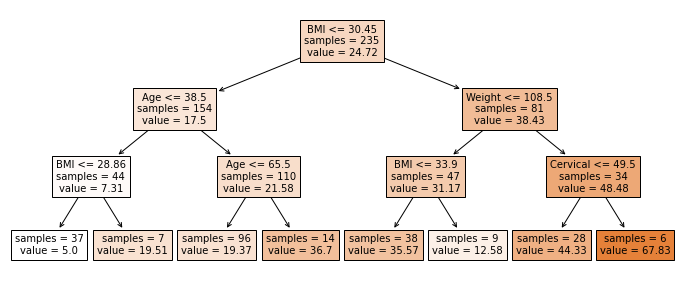

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")
plot_tree(
            decision_tree = clf,
            feature_names = df[predictors].columns,
            class_names   = 'IAH',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### Standard with cross validation

MSE cross validated:  441.24599955131686
RMSE cross validated:  20.773597477876475
MAE cross validated:  16.162884667710006
R2 score cross validated:  0.12983488862926074


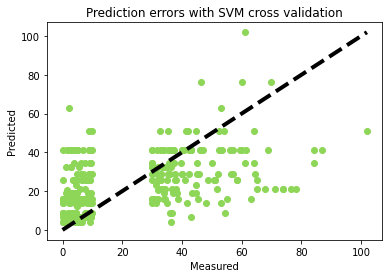

In [25]:
mse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_squared_error')
rmse_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_root_mean_squared_error')
mae_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'neg_mean_absolute_error')
r2_cross = cross_val_score(clf, x, y, cv = 3, scoring = 'r2')

print("MSE cross validated: ",abs(mse_cross.mean()))
print("RMSE cross validated: ",abs(rmse_cross.mean()))
print("MAE cross validated: ",abs(mae_cross.mean()))
print("R2 score cross validated: ",r2_cross.mean())

y_pred_tree_cross = cross_val_predict(clf, x, y, cv = 3) #Para pintar solo
fig, ax = plt.subplots()
ax.scatter(y, y_pred_tree_cross, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM cross validation')
plt.show()

### GridSearch

In [26]:
clf = DecisionTreeRegressor()
grid_values = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'r2', cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [27]:
print(f'Best Score: {grid_clf_acc.best_score_:.3f}\n')
print(f'Best estimator: {grid_clf_acc.best_estimator_}\n')
print(f'Best parameter set: {grid_clf_acc.best_params_}\n')

Best Score: 0.193

Best estimator: DecisionTreeRegressor(max_depth=3, max_features='log2', max_leaf_nodes=20,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1)

Best parameter set: {'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}



MSE:  458.20578255853815
RMSE:  21.40574181285335
MAE:  18.29856780140562
R2 score:  0.18389901549787524


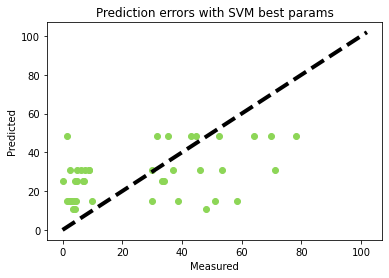

In [28]:
#Predict values based on new parameters
y_pred_acc_tree = grid_clf_acc.predict(X_test)

mse_acc = mean_squared_error(y_test, y_pred_acc_tree)
rmse_acc =  mean_squared_error(y_test, y_pred_acc_tree, squared=False)
mae_acc = mean_absolute_error(y_test, y_pred_acc_tree)
r2_acc = r2_score(y_test, y_pred_acc_tree)

print("MSE: ",mse_acc)
print("RMSE: ",rmse_acc)
print("MAE: ",mae_acc)
print("R2 score: ",r2_acc)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_acc_tree, c  = '#8DD657')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction errors with SVM best params')
plt.show()

## Visualization

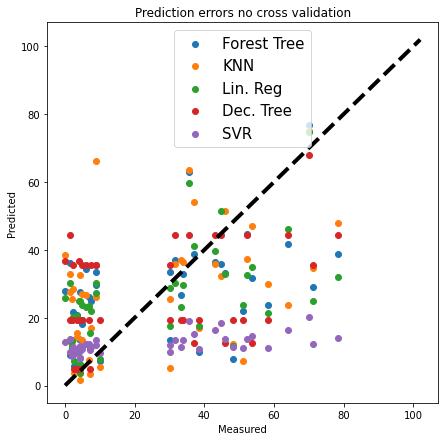

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_forest, label='Forest Tree')
plt.scatter(y_test, y_pred_knn, label= 'KNN')
plt.scatter(y_test, y_pred_linear, label = 'Lin. Reg')
plt.scatter(y_test, y_pred_tree, label= 'Dec. Tree')
plt.scatter(y_test, y_pred_svm, label= 'SVR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.legend(loc = 'upper center', fontsize=15)
plt.xlabel('Measured')
plt.ylabel('Predicted')

plt.title('Prediction errors no cross validation')
plt.show()

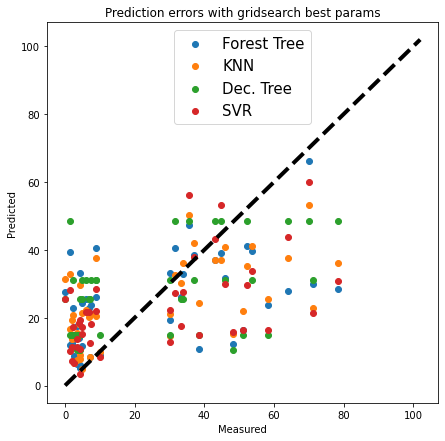

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_acc_forest, label='Forest Tree')
plt.scatter(y_test, y_pred_acc_knn, label= 'KNN')
plt.scatter(y_test, y_pred_acc_tree, label= 'Dec. Tree')
plt.scatter(y_test, y_pred_acc_svm, label= 'SVR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.legend(loc = 'upper center', fontsize=15)
plt.xlabel('Measured')
plt.ylabel('Predicted')

plt.title('Prediction errors with gridsearch best params')
plt.show()